In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('CaseCompetitionData2021.csv')
df

,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,customer_previous_purchase,customer_distance_to_dealer,post_purchase_satisfaction,vehicle_warranty_used,subsequent_purchases
0,81690,DODGE,CHARGER,2012,15001 - 20000,1,1,21 - 30,40001 - 60000,U,0,8,?,0,1
1,109994,FORD,F150,2007,15001 - 20000,0,0,51 - 60,0 - 20000,F,1,19,?,0,0
2,11399,BMW,328,2010,25001 - 30000,1,1,41 - 50,60001 - 80000,F,1,21,?,0,0
3,214156,LEXUS,GS 300,2003,10001 - 15000,0,1,21 - 30,20001 - 40000,M,0,8,?,0,0
4,36685,CHEVROLET,CRUZE,2012,15001 - 20000,1,1,31 - 40,120001 - 140000,M,1,5,?,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355869,195314,JEEP,LIBERTY,2010,15001 - 20000,0,1,21 - 30,20001 - 40000,F,0,13,?,0,0
355870,58219,CHEVROLET,SONIC,2012,10001 - 15000,1,0,71 - 80,?,U,0,2,?,0,0
355871,207386,KIA,SORENTO,2012,15001 - 20000,1,1,61 - 70,20001 - 40000,F,1,9,?,0,1
355872,252391,NISSAN,350Z,2003,10001 - 15000,0,1,21 - 30,40001 - 60000,M,0,5,?,0,0


In [2]:
def missing_count(data, col):
    return data[data[col]=='?'][col].count()

def val_count(data, key, plot=True, step=0.5, plotsize=(8,8)):
    precision = 1
    counts = data.value_counts(normalize=True) * 100
    l = len(counts.index) 
    t = 'Market Share Among {} {} (%)'.format(l, key)
    x = np.arange(step, counts.values.max(), step)
    if (plot):
        counts.plot(kind='barh', figsize=plotsize, title=t, xticks=x)
        plt.show()
    else:
        print(t)
    print(round(counts, precision))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355874 entries, 0 to 355873
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   insert_num                   355874 non-null  int64 
 1   purchase_make                355874 non-null  object
 2   purchase_model               355874 non-null  object
 3   purchase_vehicle_year        355874 non-null  int64 
 4   purchase_price               355874 non-null  object
 5   trade_in                     355874 non-null  int64 
 6   vehicle_financing            355874 non-null  int64 
 7   customer_age                 355874 non-null  object
 8   customer_income              355874 non-null  object
 9   customer_gender              355874 non-null  object
 10  customer_previous_purchase   355874 non-null  int64 
 11  customer_distance_to_dealer  355874 non-null  object
 12  post_purchase_satisfaction   355874 non-null  object
 13  vehicle_warran

In [4]:
for col in df.columns:
    if df[col].dtype == 'O':
        print('Number of missing values in column {}: {}'.\
              format(col, missing_count(df, col)))

Number of missing values in column purchase_make: 0
Number of missing values in column purchase_model: 0
Number of missing values in column purchase_price: 3
Number of missing values in column customer_age: 1098
Number of missing values in column customer_income: 45998
Number of missing values in column customer_gender: 0
Number of missing values in column customer_distance_to_dealer: 6103
Number of missing values in column post_purchase_satisfaction: 354676


In [5]:
df.insert_num.isnull().sum()

0

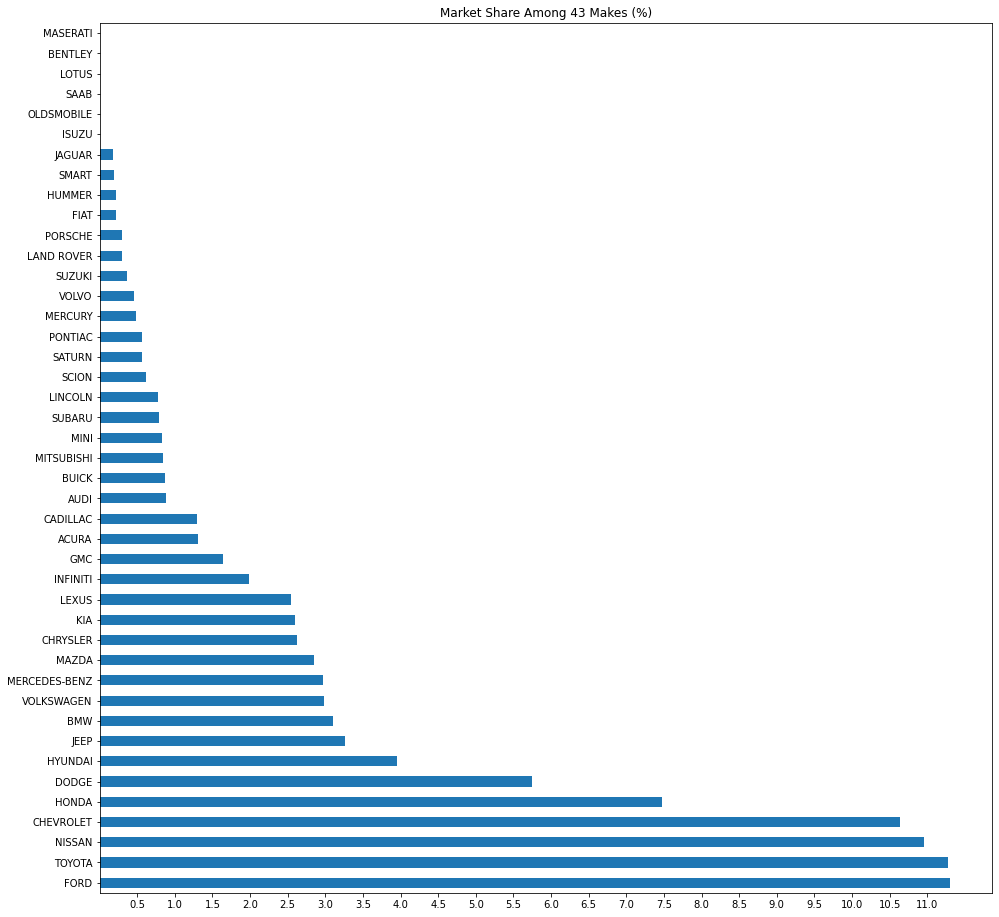

FORD             11.3
TOYOTA           11.3
NISSAN           11.0
CHEVROLET        10.6
HONDA             7.5
DODGE             5.7
HYUNDAI           4.0
JEEP              3.3
BMW               3.1
VOLKSWAGEN        3.0
MERCEDES-BENZ     3.0
MAZDA             2.8
CHRYSLER          2.6
KIA               2.6
LEXUS             2.5
INFINITI          2.0
GMC               1.6
ACURA             1.3
CADILLAC          1.3
AUDI              0.9
BUICK             0.9
MITSUBISHI        0.8
MINI              0.8
SUBARU            0.8
LINCOLN           0.8
SCION             0.6
SATURN            0.6
PONTIAC           0.6
MERCURY           0.5
VOLVO             0.5
SUZUKI            0.4
LAND ROVER        0.3
PORSCHE           0.3
FIAT              0.2
HUMMER            0.2
SMART             0.2
JAGUAR            0.2
ISUZU             0.0
OLDSMOBILE        0.0
SAAB              0.0
LOTUS             0.0
BENTLEY           0.0
MASERATI          0.0
Name: purchase_make, dtype: float64


In [6]:
val_count(df.purchase_make, key='Makes', plotsize=(16,16))

In [7]:
val_count(df.purchase_model, key='Models', plot=False)

Market Share Among 639 Models (%)
ALTIMA            3.2
CAMRY             2.7
ACCORD            2.2
MALIBU            2.0
COROLLA           1.8
                 ... 
F550              0.0
SUPRA             0.0
540               0.0
i-MIEV            0.0
CONTINENTAL GT    0.0
Name: purchase_model, Length: 639, dtype: float64


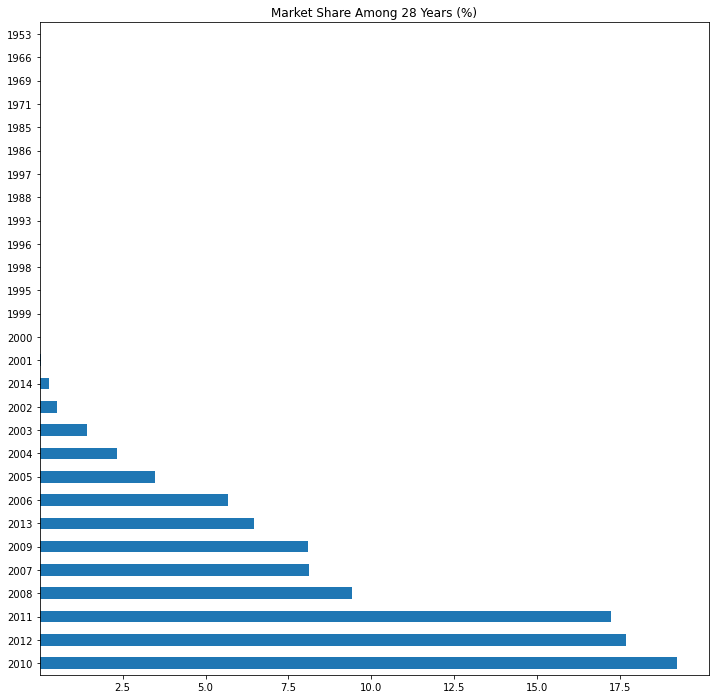

2010    19.2
2012    17.7
2011    17.2
2008     9.4
2007     8.1
2009     8.1
2013     6.5
2006     5.7
2005     3.5
2004     2.3
2003     1.4
2002     0.5
2014     0.3
2001     0.0
2000     0.0
1999     0.0
1995     0.0
1998     0.0
1996     0.0
1993     0.0
1988     0.0
1997     0.0
1986     0.0
1985     0.0
1971     0.0
1969     0.0
1966     0.0
1953     0.0
Name: purchase_vehicle_year, dtype: float64


In [8]:
val_count(df.purchase_vehicle_year, key='Years', step=2.5, plotsize=(12,12))

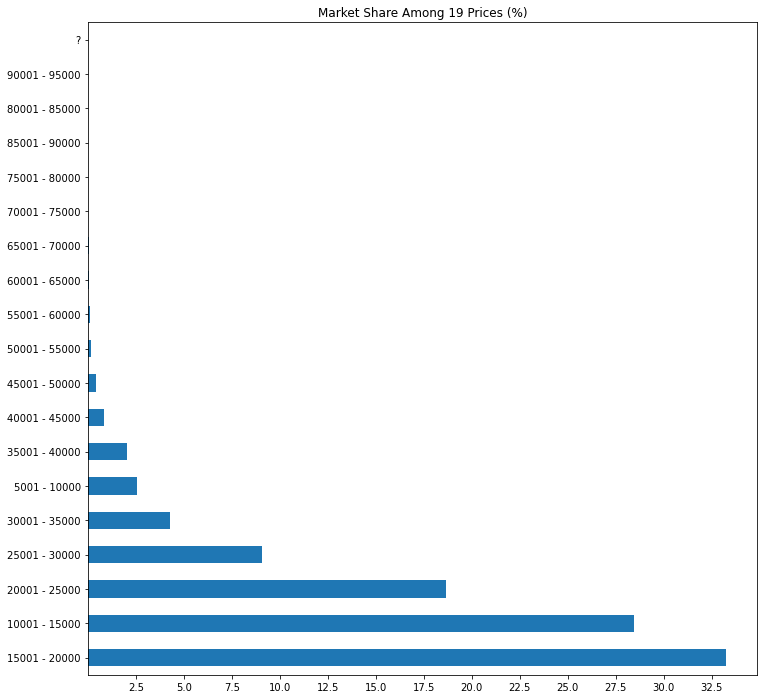

15001 - 20000    33.2
10001 - 15000    28.4
20001 - 25000    18.6
25001 - 30000     9.1
30001 - 35000     4.3
5001 - 10000      2.6
35001 - 40000     2.0
40001 - 45000     0.9
45001 - 50000     0.4
50001 - 55000     0.2
55001 - 60000     0.1
60001 - 65000     0.1
65001 - 70000     0.0
70001 - 75000     0.0
75001 - 80000     0.0
85001 - 90000     0.0
80001 - 85000     0.0
90001 - 95000     0.0
?                 0.0
Name: purchase_price, dtype: float64


In [9]:
val_count(df.purchase_price, key='Prices', step=2.5, plotsize=(12,12))

In [10]:
df.columns

Index(['insert_num', 'purchase_make', 'purchase_model',
       'purchase_vehicle_year', 'purchase_price', 'trade_in',
       'vehicle_financing', 'customer_age', 'customer_income',
       'customer_gender', 'customer_previous_purchase',
       'customer_distance_to_dealer', 'post_purchase_satisfaction',
       'vehicle_warranty_used', 'subsequent_purchases'],
      dtype='object')

In [11]:
round(df.trade_in.value_counts(normalize=True) * 100, 1)

0    53.4
1    46.6
Name: trade_in, dtype: float64

In [12]:
round(df.vehicle_financing.value_counts(normalize=True) * 100, 1)

1    77.9
0    22.1
Name: vehicle_financing, dtype: float64

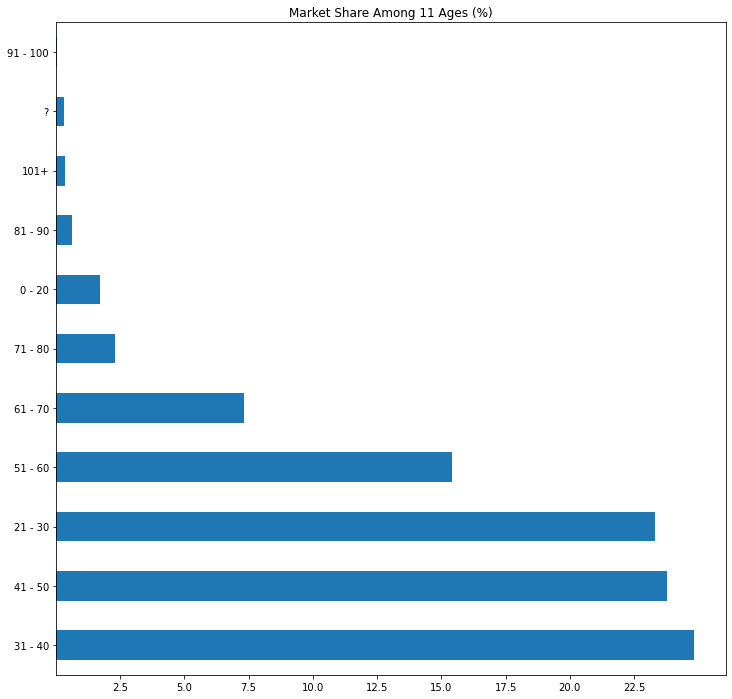

31 - 40     24.8
41 - 50     23.8
21 - 30     23.3
51 - 60     15.4
61 - 70      7.3
71 - 80      2.3
0 - 20       1.7
81 - 90      0.6
101+         0.4
?            0.3
91 - 100     0.0
Name: customer_age, dtype: float64


In [13]:
val_count(df.customer_age, key='Ages', step=2.5, plotsize=(12,12))

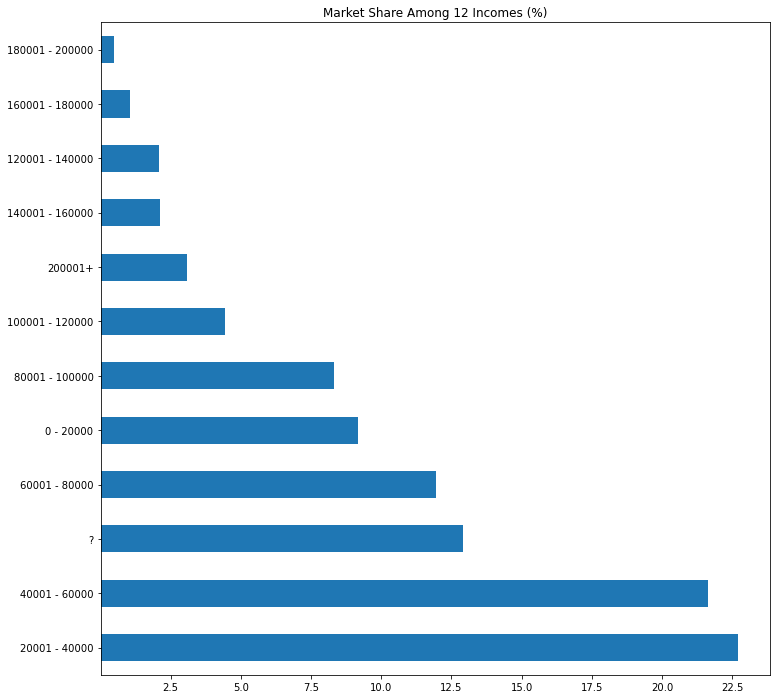

20001 - 40000      22.7
40001 - 60000      21.6
?                  12.9
60001 - 80000      12.0
0 - 20000           9.2
80001 - 100000      8.3
100001 - 120000     4.4
200001+             3.1
140001 - 160000     2.1
120001 - 140000     2.1
160001 - 180000     1.1
180001 - 200000     0.5
Name: customer_income, dtype: float64


In [14]:
val_count(df.customer_income, key='Incomes', step=2.5, plotsize=(12,12))

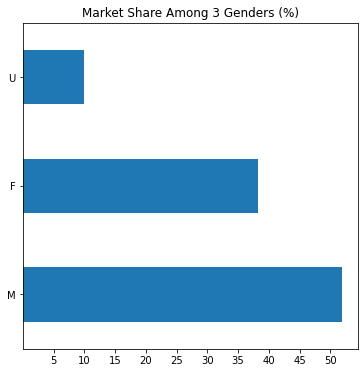

M    51.8
F    38.2
U     9.9
Name: customer_gender, dtype: float64


In [15]:
val_count(df.customer_gender, key='Genders', step=5, plotsize=(6,6))

In [16]:
round(df.customer_previous_purchase.value_counts(normalize=True) * 100, 1)

0    79.5
1    20.5
Name: customer_previous_purchase, dtype: float64

In [17]:
round(df.post_purchase_satisfaction.value_counts(normalize=True) * 100, 1)

?     99.7
10     0.2
9      0.1
8      0.0
7      0.0
5      0.0
6      0.0
0      0.0
4      0.0
3      0.0
1      0.0
Name: post_purchase_satisfaction, dtype: float64

In [18]:
round(df.vehicle_warranty_used.value_counts(normalize=True) * 100, 1)

0    74.8
1    25.2
Name: vehicle_warranty_used, dtype: float64

In [19]:
round(df.subsequent_purchases.value_counts(normalize=True) * 100, 1)

0     66.3
1     27.1
2      2.6
3      1.0
4      0.9
5      0.6
7      0.3
9      0.3
6      0.3
8      0.3
10     0.3
Name: subsequent_purchases, dtype: float64

In [20]:
df['distance'] = df['customer_distance_to_dealer'].apply(lambda x: int(x) if x != '?' else -1)

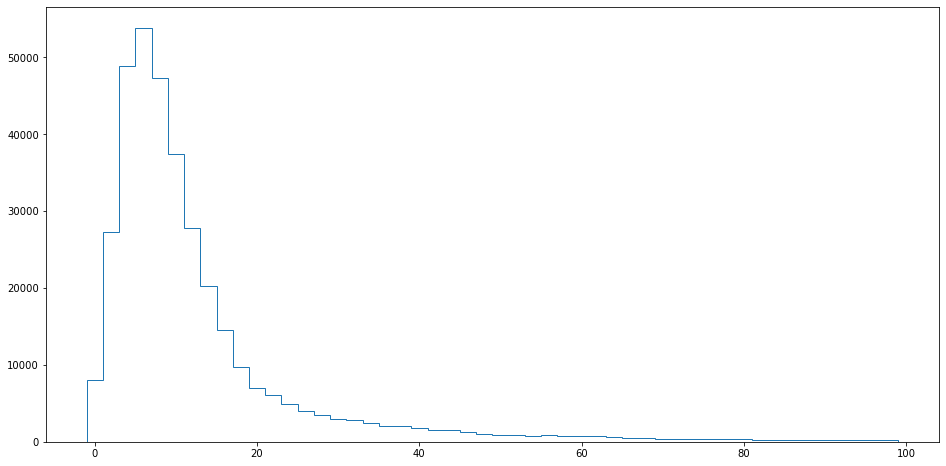

In [21]:
plt.figure().set_size_inches(16, 8) 
plt.hist(df[df['distance'] < 100]['distance'], histtype='step', bins=50)
plt.show()

In [22]:
distance_cutoff = [-1, 0, 20, 50, df['distance'].max()]
distance_labels = ['Unknown', 'L20', 'L50', 'G50']
distance_group  = pd.cut(df.distance, bins=distance_cutoff, labels=distance_labels)
df.insert(len(distance_cutoff) + 1, 'distance_bins', distance_group)

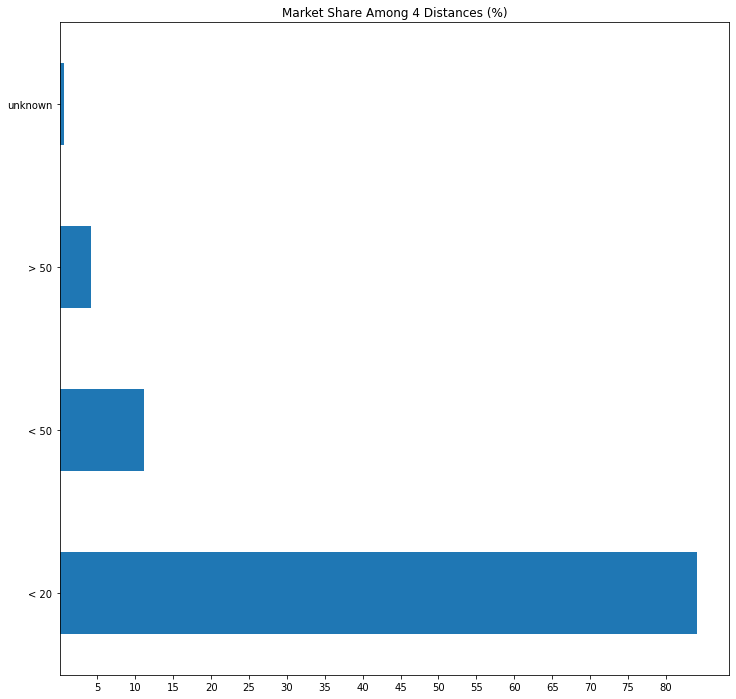

< 20       84.1
< 50       11.1
> 50        4.1
unknown     0.6
Name: distance_bins, dtype: float64


In [23]:
val_count(df.distance_bins, key='Distances', step=5, plotsize=(12,12))